In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [111]:
train = pd.read_csv('train_raw.csv')
train.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'Star_Sign', 'Date', 'Text']

test = pd.read_csv('dev_raw.csv')
test.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'Star_Sign', 'Date', 'Text']

In [112]:
train_top10 = pd.read_csv('train_top10.csv')
test_top10 = pd.read_csv('dev_top10.csv')

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score

In [114]:
train['Age_range'] = train.Age.map({14: "14-16", 15: "14-16", 16:"14-16", 24:"24-26", 25:"24-26", 26:"24-26", 34:"34-36", 35:"34-36", 36:"34-36", 44:"44-46", 45: "44-46", 46:"44-46"})
train

,User_ID,Gender,Age,Occupation,Star_Sign,Date,Text,Age_range
0,5114,male,25,indUnk,Scorpio,"01,May,2001",I'm DSLless for 10 days. I suppo...,24-26
1,5114,male,25,indUnk,Scorpio,"01,October,2001",Crap. I ordered the new Citizen ...,24-26
2,5114,male,25,indUnk,Scorpio,"01,October,2002",I can't get enough of CBC's urlL...,24-26
3,5114,male,25,indUnk,Scorpio,"01,October,2002",In case anyone's sitting on the e...,24-26
4,5114,male,25,indUnk,Scorpio,"02,April,2001",urlLink 'We reinvented culture t...,24-26
5,5114,male,25,indUnk,Scorpio,"02,April,2001",urlLink There's a great article ...,24-26
6,5114,male,25,indUnk,Scorpio,"02,December,2001",I'm the top left corner on Cory D...,24-26
7,5114,male,25,indUnk,Scorpio,"02,December,2003",I've started a film blog: urlLi...,24-26
8,5114,male,25,indUnk,Scorpio,"02,June,2001",urlLink Great roadtrip article b...,24-26
9,5114,male,25,indUnk,Scorpio,"02,March,2002",urlLink Daily Relay is finally ...,24-26


In [115]:
test['Age_range'] = test.Age.map({14: "14-16", 15: "14-16", 16:"14-16", 24:"24-26", 25:"24-26", 26:"24-26", 34:"34-36", 35:"34-36", 36:"34-36", 44:"44-46", 45: "44-46", 46:"44-46"})
test['Age_range'].fillna("?", inplace=True)
test

,User_ID,Gender,Age,Occupation,Star_Sign,Date,Text,Age_range
0,11253,male,26,Technology,Aquarius,"08,July,2004","Induction, on Monday, was in a buil...",24-26
1,11253,male,26,Technology,Aquarius,"09,July,2004",At last back to a normal company wh...,24-26
2,11253,male,26,Technology,Aquarius,"11,July,2004",Can't the urlLink weather just so...,24-26
3,11253,male,26,Technology,Aquarius,"12,July,2004",...is a guy painting a blue wall bl...,24-26
4,11253,male,26,Technology,Aquarius,"14,July,2004",My Dad has always wanted to go to ...,24-26
5,11253,male,26,Technology,Aquarius,"20,July,2004",About to go t bed late (again) got ...,24-26
6,46465,male,25,Internet,Virgo,"01,August,2004",The Ultimate Death Survey What do you...,24-26
7,46465,male,25,Internet,Virgo,"01,August,2004",The Ultimate Politics Survey Describe...,24-26
8,46465,male,25,Internet,Virgo,"01,August,2004",After an exotic meal of macaroni &amp; ...,24-26
9,46465,male,25,Internet,Virgo,"02,August,2004",My sister is leaving me! Now I dont hav...,24-26


In [99]:
cleanup_nums = {"Age_range": {"14-16": 1, "24-26": 2, "34-36": 3, "44-46": 4}}
train.replace(cleanup_nums, inplace=True)
test.replace(cleanup_nums, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E527BBB4A8>]],
      dtype=object)

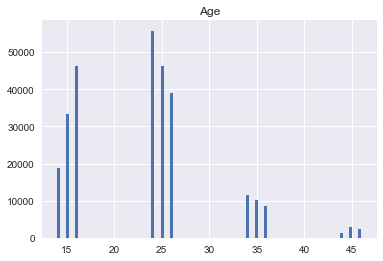

In [100]:
train.hist(column='Age', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002232400DEF0>]],
      dtype=object)

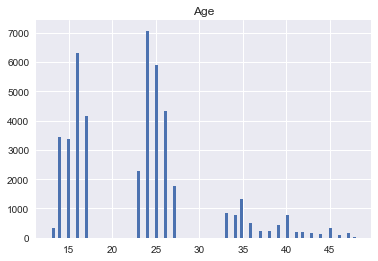

In [10]:
test.hist(column='Age', bins=100)

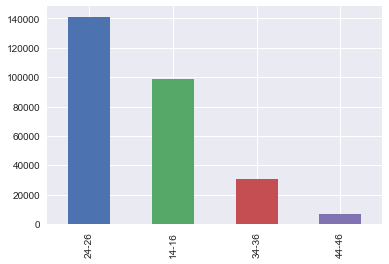

In [12]:
train['Age_range'].value_counts().plot(kind='bar')

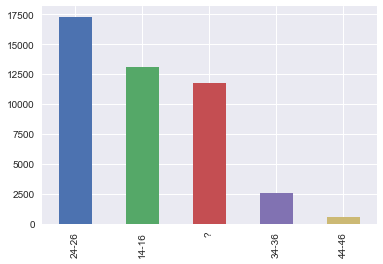

In [13]:
test['Age_range'].value_counts().plot(kind='bar')

In [116]:
X_train = train['Text'].values
Y_train = train['Age_range'].values
X_test = test['Text'].values
Y_test = test['Age_range'].values

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler, scale
from sklearn.linear_model import LogisticRegression


In [38]:
from io import StringIO
df = train
col = ['Age_range', 'Text']
df = df[col]
df = df[pd.notnull(train['Text'])]
df.columns = ['Age_range', 'Text']
df['age_id'] = df['Age_range'].factorize()[0]
age_id_df = df[['Age_range', 'age_id']].drop_duplicates().sort_values('age_id')
age_to_id = dict(age_id_df.values)
#id_to_age = dict(age_to_id[['age_id', 'Age_range']].values)
df.tail(10)


,Age_range,Text,age_id
276404,24-26,This is the game-by-game predicti...,0
276405,24-26,"Hmm, now that I have did all the ...",0
276406,24-26,"For some reason, I'm obsessed...",0
276407,24-26,I’m pissed off at this movie and at M. ...,0
276408,24-26,Just posting something so I can muck ar...,0
276409,24-26,Was there any doubt? Yes some….but non...,0
276410,24-26,Where is my damned wallet? I couldn't ...,0
276411,14-16,"This may be a bit of a rush; after all,...",3
276412,14-16,He never saw it coming And look where...,3
276413,24-26,It has been said the most importa...,0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.9, min_df=5, norm='l2', stop_words='english')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
np.mean(y_pred == Y_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.5172177979748958

In [15]:
confusion_matrix(Y_test, y_pred_class)

array([[ 8059,  5024,    12,     5,     0],
       [ 1856, 15376,    55,    10,     0],
       [   62,  2510,    11,     1,     0],
       [   19,   528,     4,     0,     0],
       [ 2806,  8929,    49,    15,     0]])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.9, min_df=5, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
np.mean(y_pred == Y_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.5172177979748958

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=5, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)


C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [81]:
X_test_dtm

<45331x82918 sparse matrix of type '<class 'numpy.float64'>'
	with 2830517 stored elements in Compressed Sparse Row format>

In [19]:
confusion_matrix(Y_test, y_pred_class)

array([[ 8059,  5024,    12,     5,     0],
       [ 1856, 15376,    55,    10,     0],
       [   62,  2510,    11,     1,     0],
       [   19,   528,     4,     0,     0],
       [ 2806,  8929,    49,    15,     0]])

In [21]:
tfidf.vocabulary_

{'10': 123,
 'days': 19451,
 'suppose': 71312,
 'compared': 16151,
 'companies': 16140,
 'pretty': 57453,
 'snappy': 67691,
 'service': 65218,
 'dsl': 22971,
 'crap': 17941,
 'ordered': 52470,
 'new': 50210,
 'citizen': 14944,
 'kane': 39981,
 'dvd': 23287,
 'urllink': 77595,
 'place': 55877,
 'day': 19423,
 'today': 74341,
 'bucks': 11588,
 'cheaper': 14098,
 'cbc': 13457,
 '50th': 1550,
 'anniversary': 5071,
 'specials': 68703,
 'wish': 80822,
 'start': 69616,
 'cable': 12281,
 'channel': 13881,
 'stuff': 70506,
 '50s': 1549,
 '60s': 1723,
 '70s': 1851,
 '80s': 1977,
 'case': 13164,
 'sitting': 66851,
 'edge': 23639,
 'site': 66829,
 'rest': 61462,
 'assured': 6468,
 'mindjack': 47267,
 'relaunch': 60766,
 'track': 74912,
 'monday': 48030,
 'word': 81163,
 'reinvented': 60698,
 'culture': 18610,
 'way': 79603,
 'wanted': 79315,
 'great': 31727,
 'big': 9243,
 'shoes': 65972,
 'david': 19393,
 'bowie': 10765,
 'writes': 81459,
 'glam': 30823,
 'guardian': 32161,
 'article': 6127,
 'wi

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)


0.5172177979748958

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)


0.5172177979748958

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_class)

0.5343583860934019

In [23]:
confusion_matrix(Y_test, y_pred_class)

array([[ 9449,  3585,    63,     3,     0],
       [ 2363, 14664,   263,     7,     0],
       [  162,  2311,   110,     1,     0],
       [   33,   496,    22,     0,     0],
       [ 3523,  8110,   156,    10,     0]])

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=5, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
print(accuracy_score(Y_test, y_pred))

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.5172177979748958


In [43]:
confusion_matrix(Y_test, y_pred)

array([[ 8058,  5026,    11,     5,     0],
       [ 1858, 15378,    52,     9,     0],
       [   67,  2506,    10,     1,     0],
       [   19,   528,     4,     0,     0],
       [ 2809,  8927,    48,    15,     0]])

In [38]:
len(tfidf.vocabulary_)

82870

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)


In [49]:
print(accuracy_score(Y_test, y_pred_class))

0.5345789856830866


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=10, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
print(accuracy_score(Y_test, y_pred))

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


0.5157397807240078


In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(accuracy_score(Y_test, y_pred_class))

0.5343363261344334


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=5, norm='l1', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
print(accuracy_score(Y_test, y_pred))

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(accuracy_score(Y_test, y_pred_class))

0.4935254020427522


In [64]:
train = train[['Text', 'Age_range']]

In [20]:
from sklearn.metrics import accuracy_score
cnt = CountVectorizer(max_df=0.3, min_df=5, stop_words='english')
cnt.fit(X_train)
X_train_dtm = cnt.transform(X_train)
X_test_dtm = cnt.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
np.mean(y_pred == Y_test)

0.4700977256182304

In [13]:
train_avg_len = []
train_word_len = []
for i in range(len(train)):
    length = 0
    count = 0 
    for word in X_train[i].split():
        length += len(word)
        count+=1
    if count>0:
        train_avg_len.append(length/count)
        train_word_len.append(count)
    else:
        train_avg_len.append(0)
        train_word_len.append(0)

In [42]:
test_avg_len = []
test_word_len = []
for i in range(len(Test)):
    length = 0
    count = 0 
    for word in X_test[i].split():
        length += len(word)
        count+=1
    if count>0:
        test_avg_len.append(length/count)
        test_word_len.append(count)
    else:
        test_avg_len.append(0)
        test_word_len.append(0)

In [44]:
#test['Avg_len'] = test_avg_len
Test['Word_len'] = test_word_len
test.groupby(['Age_range']).mean()

,User_ID,Age,Avg_len,Word_len
Age_range,,,,
1,2.826673e+06,15.218244,4.631954,164.801069
2,2.441573e+06,24.841475,5.020235,192.507198
3,3.321146e+06,34.895511,4.813172,155.217492
4,2.429784e+06,44.983666,4.648803,212.477314
?,2.439339e+06,25.469701,4.587820,179.609458


In [14]:
train['Avg_len'] = train_avg_len
train['Word_len'] = train_word_len
train.groupby(['Age_range']).mean()

,User_ID,Age,Avg_len,Word_len
Age_range,,,,
1,2.950558e+06,15.278424,4.581198,169.012412
2,2.342761e+06,24.881781,4.663461,181.852491
3,2.262677e+06,34.906745,4.632030,190.289353
4,2.368609e+06,45.145469,4.661797,205.098157


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=5, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [77]:
np.mean(y_pred_class == Y_test)

0.5345789856830866

In [25]:
from scipy.sparse import hstack
X_train_dtm = hstack((X_train_dtm,np.array(train['Word_len'])[:,None]))
X_train_dtm = hstack((X_train_dtm,np.array(train['Avg_len'])[:,None]))

In [26]:
X_test_dtm = hstack((X_test_dtm,np.array(test['Word_len'])[:,None]))
X_test_dtm = hstack((X_test_dtm,np.array(test['Avg_len'])[:,None]))

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
np.mean(y_pred_class == Y_test)


0.5345789856830866

In [35]:
logreg = LogisticRegression(class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48})
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
np.mean(y_pred_class == Y_test)


0.5303434735611392

In [127]:
from sklearn.linear_model import LogisticRegression
c = 2.1
for i in range(20):
    logreg = LogisticRegression(class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=c)
    logreg.fit(X_train_dtm, Y_train)
    y_pred_class = logreg.predict(X_test_dtm)
    print("{}: {}".format(c, np.mean(y_pred_class == Y_test)))
    c += 0.1

2.1: 0.5334539277756943
2.2: 0.5334098078577574
2.3000000000000003: 0.5335421676115683
2.4000000000000004: 0.5335862875295052
2.5000000000000004: 0.5335201076525997
2.6000000000000005: 0.5336745273653791
2.7000000000000006: 0.53380688711919
2.8000000000000007: 0.533762767201253
2.900000000000001: 0.5340054267499063
3.000000000000001: 0.5339171869140323
3.100000000000001: 0.5339833667909377
3.200000000000001: 0.5339392468730008
3.300000000000001: 0.5339392468730008
3.4000000000000012: 0.5338951269550639
3.5000000000000013: 0.5338951269550639


KeyboardInterrupt: 

In [125]:
from sklearn.linear_model import LogisticRegression
c = 1.1
for i in range(10):
    logreg = LogisticRegression(class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=c)
    logreg.fit(X_train_dtm, Y_train)
    y_pred_class = logreg.predict(X_test_dtm)
    print("{}: {}".format(c, np.mean(y_pred_class == Y_test)))
    c += 0.1

1.1: 0.5310935121660674
1.2000000000000002: 0.5314905914275
1.3000000000000003: 0.5320862103196488
1.4000000000000004: 0.5321744501555227
1.5000000000000004: 0.5325935893759237
1.6000000000000005: 0.5327480090887031
1.7000000000000006: 0.5329906686373563
1.8000000000000007: 0.5330347885552933
1.9000000000000008: 0.5330568485142617
2.000000000000001: 0.5332774481039465


In [56]:
np.mean(y_pred_class == Y_test)

0.5160486201495665

In [65]:
X_test_dtm

<45331x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 85795 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=5000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
np.mean(y_pred == Y_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.5041362423065893

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train_chi2_dtm, Y_train)
y_pred_class = logreg.predict(X_test_chi2_dtm)
np.mean(y_pred == Y_test)

0.5041362423065893

In [86]:
X_train_dtm

<276414x82918 sparse matrix of type '<class 'numpy.float64'>'
	with 17139237 stored elements in Compressed Sparse Row format>

In [67]:
np.mean(y_pred_class == Y_test) #1000

0.4273234651783548

In [53]:
np.mean(y_pred_class == Y_test)

0.4700977256182304

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_mi_dtm, Y_train)
y_pred = nb.predict(X_test_mi_dtm)
np.mean(y_pred == Y_test)

In [101]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)

0.5220048090710552

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)

In [32]:
from sklearn import svm
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)

0.5382850587897906

In [19]:
# Tf - C = 0.4
from sklearn import svm
c = 0.1
for i in range(10):
    clf = svm.LinearSVC(loss='hinge', C=c)
    clf.fit(X_train_dtm, Y_train)
    y_pred = clf.predict(X_test_dtm)
    print("{}: {}".format(c, np.mean(y_pred == Y_test)))
    c += 0.1

0.1: 0.5269021199620568
0.2: 0.5341819064216541
0.30000000000000004: 0.5361893626877854
0.4: 0.537468840307957
0.5: 0.5373144205951776
0.6: 0.537005581169619
0.7: 0.536630561867155
0.7999999999999999: 0.5358143433853213
0.8999999999999999: 0.5353290242880149
0.9999999999999999: 0.5342480862985595


In [22]:
#CV
from sklearn import svm
c = 0.01
for i in range(10):
    clf = svm.LinearSVC(loss='hinge', C=c)
    clf.fit(X_train_dtm, Y_train)
    y_pred = clf.predict(X_test_dtm)
    print("{}: {}".format(c, np.mean(y_pred == Y_test)))
    c += 0.01

0.01: 0.5147029626524895
0.02: 0.5170413183031479
0.03: 0.5177913569080762
0.04: 0.5176589971542653
0.05: 0.5166662990006838


KeyboardInterrupt: 

In [30]:
clf = svm.LinearSVC(loss='hinge', C=0.03, class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48})
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))

0.5246299441883038


In [29]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(train.Age_range), Y_train)

array([ 0.70188616,  0.48973799,  2.27711141, 10.61497696])

In [53]:
np.mean(y_pred_class == Y_test)

0.4700977256182304

In [42]:
Y_train_with_dummies = pd.get_dummies(Y_train)
Y_test_with_dummies = pd.get_dummies(Y_test)

In [100]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

def word_count(clas):
    
    stop_words = set(stopwords.words("english"))    
    all_words = []
    rgtok = RegexpTokenizer(u'(?u)\\b\\w\\w\\w\\w\\w\\w\\w\\w\\w\\w+\\b')
    lem = WordNetLemmatizer()

    for text in list(train[train["Age_range"] == clas ]["Text"]):
        for word in (rgtok.tokenize(text)):
                if word not in stop_words and not word.isdigit():        
                    all_words.append(lem.lemmatize(word.lower()) )

    all_words_d = nltk.FreqDist(all_words)
    most_common = pd.DataFrame(data=all_words_d.most_common(50), columns=["Word", "Count"])            
    
    return(most_common)
    #fig, ax = plt.subplots(figsize=(10, 10))
    #ax = sns.barplot(y="Word", x="Count", data=most_common, ax=ax, orient="h")

In [102]:
word_list = []
for word in word_count("14-16")['Word']:
    word_list.append(word)
for word in word_count("24-26")['Word']:
    word_list.append(word)
for word in word_count("34-36")['Word']:
    word_list.append(word)
for word in word_count("44-46")['Word']:
    word_list.append(word)
word_set = set(word_list)


In [104]:
word_list = []
for word in word_set:
    word_list.append(word)

In [106]:
len(word_list)

80

In [80]:
# instantiate the vectorizer
vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
# examine the document-term matrix
X_train_dtm

<276414x381595 sparse matrix of type '<class 'numpy.int64'>'
	with 27999046 stored elements in Compressed Sparse Row format>

In [56]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<45331x381595 sparse matrix of type '<class 'numpy.int64'>'
	with 4593859 stored elements in Compressed Sparse Row format>

In [77]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(tfidf, Y_train)
y_pred_class = logreg.predict(tfidf)
np.mean(y_pred == Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [45331, 276414]

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred_class)

In [62]:
# print the confusion matrix
metrics.confusion_matrix(Y_test, y_pred_class)

array([[ 8920,  3859,   293,    28,     0],
       [ 2931, 12841,  1462,    63,     0],
       [  145,  1985,   442,    12,     0],
       [   31,   428,    91,     1,     0],
       [ 3512,  7373,   884,    30,     0]])

In [70]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# train the model using X_train_dtm
logreg.fit(X_train_dtm, Y_train)
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [74]:
# calculate accuracy
metrics.accuracy_score(Y_test, y_pred_class)

0.5228430875118573

In [85]:
Y_train_top10 = train_top10[train_top10.columns[-1]]
X_train_top10 = train_top10[train_top10.columns[1:-1]]
Y_test_top10 = test_top10[test_top10.columns[-1]]
X_test_top10 = test_top10[test_top10.columns[1:-1]]


In [86]:
nb = MultinomialNB()
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_top10, Y_train)


Wall time: 1.1 s


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_top10)
# calculate accuracy of class predictions
metrics.accuracy_score(Y_test, y_pred_class)

0.43063245902362624

In [28]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
 ('tfidf', TfidfTransformer()),
 ('clf', MultinomialNB()),
])

In [52]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, n_iter=5, random_state=42)),
])


In [53]:
text_clf_svm = text_clf_svm.fit(X_train, Y_train)
y_pred = text_clf_svm.predict(X_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


NameError: name 'metrics' is not defined

In [55]:
np.mean(y_pred == Y_test)

0.46078842293353334

In [86]:
y_pred_range = pd.cut(y_pred, [0,14,17,20,23,26,29,32,35,38,41,100], right=False)

In [87]:
y_pred_range

[[23, 26), [23, 26), [23, 26), [23, 26), [23, 26), ..., [23, 26), [23, 26), [14, 17), [23, 26), [23, 26)]
Length: 45331
Categories (11, interval[int64]): [[0, 14) < [14, 17) < [17, 20) < [20, 23) ... [32, 35) < [35, 38) < [38, 41) < [41, 100)]

In [88]:
Y_test_range = pd.cut(Y_test, [0,14,17,20,23,26,29,32,35,38,41,100], right=False)

In [226]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
vect = CountVectorizer(max_df=0.3,min_df=5,stop_words='english', analyzer='word')
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)


In [228]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=5000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
np.mean(y_pred == Y_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.4698550660695771

In [225]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
#chi2 = SelectKBest(chi2, k='all')
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
logreg = LogisticRegression()
logreg.fit(X_train_chi2_dtm, Y_train)
y_pred_class = logreg.predict(X_test_chi2_dtm)
np.mean(y_pred == Y_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.4698550660695771

In [229]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=5000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))
    

    

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.46471509562992214


In [230]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
vect = CountVectorizer(min_df=5,stop_words='english', analyzer='word')
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)


In [232]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=5000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))
    

    

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.46385475723015157


In [237]:
logreg = LogisticRegression()
logreg.fit(X_train_chi2_dtm, Y_train)
y_pred_class = logreg.predict(X_test_chi2_dtm)
np.mean(y_pred == Y_test)
    

    

0.4698550660695771

In [238]:
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_chi2_dtm, Y_train)
y_pred = clf.predict(X_test_chi2_dtm)
np.mean(y_pred == Y_test)

0.5126513864684211

In [236]:

nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))
    
%time
    

0.4698550660695771
Wall time: 1.05 ms


In [241]:
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))
%time

0.5088129536079062
Wall time: 0 ns


In [243]:
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)


0.5088350135668748

In [209]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=15000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))
    

    

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.5108424698330061


In [211]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k=80000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.5166662990006838


In [213]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(chi2, k='all')
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


0.5167765987955263


In [215]:
#CV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
chi2 = SelectKBest(mutual_info_classif, k=1000)
X_train_chi2_dtm = chi2.fit_transform(X_train_dtm, Y_train)
X_test_chi2_dtm = chi2.transform(X_test_dtm)
nb = MultinomialNB()
nb.fit(X_train_chi2_dtm, Y_train)
y_pred = nb.predict(X_test_chi2_dtm)
print(np.mean(y_pred == Y_test))

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:608: RuntimeWarning: invalid value encountered in log
  log_outer = -np.log(outer) + log(pi.sum()) + log(pj.sum())


KeyboardInterrupt: 

In [117]:
vect = TfidfVectorizer(min_df=5, max_df=0.3, stop_words='english', analyzer='word', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [118]:
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))

0.5158280205598818


In [119]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

      14-16       0.63      0.60      0.62     13100
      24-26       0.47      0.89      0.62     17297
      34-36       0.07      0.00      0.01      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.37      0.52      0.41     45331



C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
print(confusion_matrix(Y_test,y_pred))

[[ 7925  5165     8     2     0]
 [ 1800 15451    42     4     0]
 [   56  2520     7     1     0]
 [   17   531     3     0     0]
 [ 2765  8985    46     3     0]]


In [54]:
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))

0.5160927400675035


In [252]:
vect.vocabulary_

{'days': 121339,
 'suppose': 546391,
 'compared': 96980,
 'companies': 96632,
 'pretty': 435565,
 'snappy': 518076,
 'service': 499880,
 'dsl': 145378,
 'days suppose': 122142,
 'companies s': 96667,
 's pretty': 479093,
 'service s': 500048,
 's days': 475550,
 'crap': 108137,
 'ordered': 400688,
 'new': 381868,
 'citizen': 85932,
 'kane': 282060,
 'dvd': 146662,
 'urllink': 605010,
 'place': 421498,
 'day': 118995,
 'today': 582010,
 'bucks': 62394,
 'cheaper': 80415,
 'ordered new': 400721,
 'citizen kane': 85935,
 'dvd urllink': 146757,
 'urllink place': 608021,
 'place day': 421677,
 'day today': 121041,
 'today bucks': 582243,
 'bucks cheaper': 62400,
 'cheaper urllink': 80428,
 'cbc': 76001,
 '50th': 1619,
 'anniversary': 17026,
 'specials': 525779,
 'wish': 641756,
 'd': 113655,
 'start': 530051,
 'cable': 66894,
 'channel': 79284,
 'stuff': 540307,
 '50s': 1616,
 '60s': 1767,
 '70s': 1860,
 '80s': 1964,
 'cbc s': 76006,
 's urllink': 481131,
 '50th anniversary': 1620,
 'wish d

In [253]:
logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)
y_pred_class = logreg.predict(X_test_dtm)
print(np.mean(y_pred == Y_test))

0.5158280205598818


In [129]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

      14-16       0.63      0.60      0.62     13100
      24-26       0.47      0.89      0.62     17297
      34-36       0.07      0.00      0.01      2584
      44-46       0.00      0.00      0.00       551
          ?       0.00      0.00      0.00     11799

avg / total       0.37      0.52      0.41     45331



C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
print(confusion_matrix(Y_test,y_pred))

[[ 7925  5165     8     2     0]
 [ 1800 15451    42     4     0]
 [   56  2520     7     1     0]
 [   17   531     3     0     0]
 [ 2765  8985    46     3     0]]


In [128]:
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)


TypeError: '<' not supported between instances of 'str' and 'int'

In [28]:
from sklearn import svm
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)
np.mean(y_pred == Y_test)


0.49844477289272243

In [192]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
nmf = NMF(n_components=4)
nmf_x=nmf.fit_transform(X_train_dtm)
nmf_test_dtm = nmf.transform(X_test_dtm)

In [194]:
clf = svm.LinearSVC(class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(nmf_x, Y_train)
y_pred = clf.predict(nmf_test_dtm)
np.mean(y_pred == Y_test)

0.38243144867750545

In [186]:
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(nmf_x, Y_train)
y_pred = clf.predict(nmf_test_dtm)
np.mean(y_pred == Y_test)

0.41141823476208333

In [181]:
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(nmf_x, Y_train)
y_pred = clf.predict(nmf_test_dtm)
np.mean(y_pred == Y_test)

0.4033663497385895

In [172]:
vect = CountVectorizer(min_df=5,stop_words='english', analyzer='word')
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
np.mean(y_pred == Y_test)

0.4698550660695771

In [171]:
vect = CountVectorizer(max_df=0.9, min_df=5,stop_words='english', analyzer='word')
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)
np.mean(y_pred == Y_test)

0.4698550660695771

In [ ]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [ ]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [104]:
Y_Train[Y_Train == '?'] = 5
Y_Train = Y_Train.astype(int)

array([2, 2, 2, ..., 1, 1, 2])

In [31]:
Test = pd.read_csv('test_raw.csv', header=None)
Test.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'Star_Sign', 'Date', 'Text']
X_Test = Test['Text']


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=5, norm='l2', stop_words='english', analyzer='word')
tfidf.fit(X_train)
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_Test)


C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [115]:
nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)
y_pred = nb.predict(X_test_dtm)

In [40]:
vect = TfidfVectorizer(min_df=5, max_df = 0.3, stop_words='english', analyzer='word', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', ngram_range=(1,2))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_Test)
X_train_dtm = hstack((X_train_dtm,np.array(train['Word_len'])[:,None]))


C:\Users\kenne\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


ValueError: blocks[0,:] has incompatible row dimensions

In [45]:
X_test_dtm = hstack((X_test_dtm,np.array(Test['Word_len'])[:,None]))
clf = svm.LinearSVC(loss='hinge', class_weight = {1:2.27, 2:10.6, 3:0.7, 4:0.48}, C=0.4)
clf.fit(X_train_dtm, Y_train)
y_pred = clf.predict(X_test_dtm)

In [46]:
id_list = []
for i in range(1,len(Test)+1):
    idd = "3"+str(i)
    id_list.append(int(idd))

In [47]:
results = pd.DataFrame(id_list, columns=["Id"])

In [48]:
results['Prediction']=y_pred

In [49]:
results['Prediction'] =  results.Prediction.map({2:'24-26', 1:'14-16', 3:'34-36',4:'44-46'})

In [50]:
results.to_csv('svc_td.csv',index=False,header=['Id','Prediction'])

In [51]:
results

,Id,Prediction
0,31,24-26
1,32,24-26
2,33,24-26
3,34,24-26
4,35,24-26
5,36,24-26
6,37,24-26
7,38,24-26
8,39,24-26
9,310,24-26


In [133]:
results[results.columns[0]].astype(int)

0            31
1            32
2            33
3            34
4            35
5            36
6            37
7            38
8            39
9           310
10          311
11          312
12          313
13          314
14          315
15          316
16          317
17          318
18          319
19          320
20          321
21          322
22          323
23          324
24          325
25          326
26          327
27          328
28          329
29          330
          ...  
42984    342985
42985    342986
42986    342987
42987    342988
42988    342989
42989    342990
42990    342991
42991    342992
42992    342993
42993    342994
42994    342995
42995    342996
42996    342997
42997    342998
42998    342999
42999    343000
43000    343001
43001    343002
43002    343003
43003    343004
43004    343005
43005    343006
43006    343007
43007    343008
43008    343009
43009    343010
43010    343011
43011    343012
43012    343013
43013    343014
Name: Id, Length: 43014,

In [93]:
results.loc[43013] = [343014,"24-26"]

In [181]:
results['Id']=results['Id'].astype(int)

In [185]:
results['Prediction']=results['Prediction'].astype('category', categories=["14-16", "24-26", '34-36','44-46'])

C:\Users\kenne\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':


In [1]:
results.index

NameError: name 'results' is not defined

In [49]:
len(results['Id'])

43013

In [43]:
X_Test.tail(5)

43008                           Humans have always want...
43009           Parking in major cities is a big proble...
43010           Put simply, Voice over wireless network...
43011           Recently many schemes have been propose...
43012           Will discuss Spy Fly which is being dev...
Name: Text, dtype: object